In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [2]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]


In [10]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-15-32-28_0.11907191236548054_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [19]:
vmics

array([5.5, 6. , 6.5, 7. , 7.5])

5.5 9.571595114115809e-05 24
6.0 4.9155603222382126e-05 24
6.5 1.5182313271136804e-05 24
7.0 -2.838016534704059e-05 23
7.5 -5.1485438238269505e-05 23


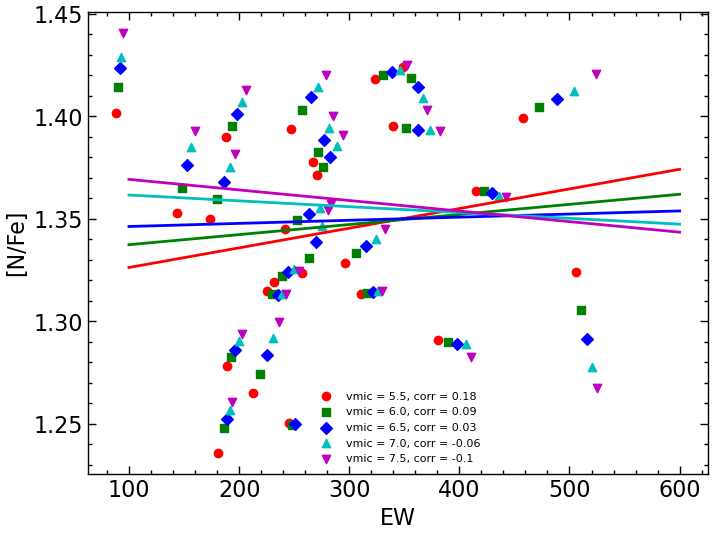

In [11]:
vmics = np.unique(output_trimmed_vmic["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 3*std_nfe)
    choose_idxs = choose_idxs[0]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(100, 600, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [22]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-24-2024-13-07-04_0.05164950234595578_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


5.0 0.0001312040043518841 24
6.5 6.78898813334831e-06 24
8.0 -0.0001560616174450083 22


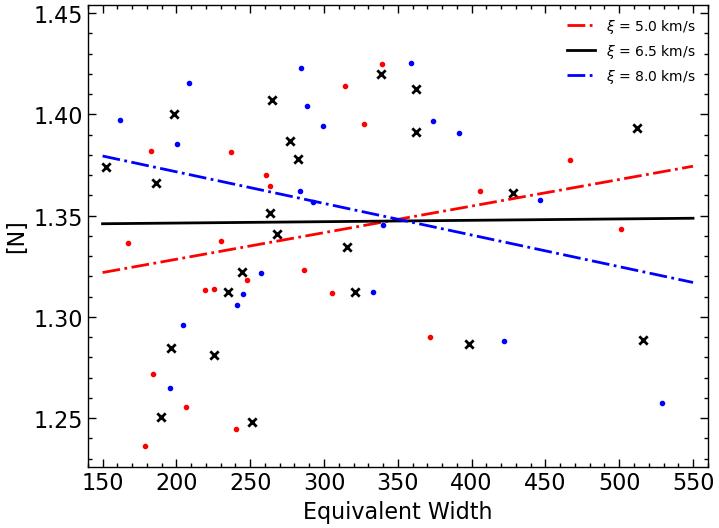

In [48]:

cs = ['r', 'k', 'b']
markers = ['.', 'x', '.']
plot_vmics = [5., 6.5, 8.0]
ls = ['-.', '-', '-.']
i = 0 
for vmic in plot_vmics:

    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 2*std_nfe)
    choose_idxs = choose_idxs[0]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    full_label = f"vmic = {vmic}, corr = {corr}"
    plt.scatter(ews[::1],nfes[::1], c=cs[i], marker = markers[i])
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(150, 550, 100)
    y = m*x + c
    print(vmic, m, len(nfes))
    plt.plot(x,y, c = cs[i], ls = ls[i], label = rf"$\xi$ = {vmic} km/s")
    plt.legend(fontsize = 10)
    plt.ylabel("[N]")
    plt.xlabel("Equivalent Width")
    plt.xlim(140,560)

    i+=1

In [64]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-17-56-23_0.9778841550265323_LTE_C_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [65]:
output_results_pd_df

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,22743.35,22742.0,22744.7,-0.8043,0.0,1.1738,6.5,0.0,0.0,4.849353,355.4072,0,0
1,HD137613.txt,22799.60,22798.0,22801.2,-1.7317,0.0,1.1333,6.5,0.0,0.0,7.452589,319.8972,0,0
2,HD137613.txt,22804.50,22802.0,22807.0,-2.1328,0.0,1.1773,6.5,0.0,0.0,7.068582,573.6960,0,0
3,HD137613.txt,22879.25,22877.0,22881.5,-2.5000,0.0,1.5892,6.5,0.0,0.0,516.901192,191.4586,10000,10010000


In [66]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,22743.35,22742.0,22744.7,-0.8043,0.0,1.1738,6.5,0.0,0.0,4.849353,355.4072,0,0
1,HD137613.txt,22799.60,22798.0,22801.2,-1.7317,0.0,1.1333,6.5,0.0,0.0,7.452589,319.8972,0,0
2,HD137613.txt,22804.50,22802.0,22807.0,-2.1328,0.0,1.1773,6.5,0.0,0.0,7.068582,573.6960,0,0


In [67]:
solar_abundances['C'] + np.mean(output_trimmed["C_Fe"])

np.float64(9.721466666666668)

In [57]:
np.std((output_trimmed["C_Fe"]))

np.float64(0.03444825426958844)

In [58]:
solar_abundances['N'] + np.mean(output_trimmed["N_Fe"])

np.float64(9.188366666666667)

In [49]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-17-58-56_0.3369505278663768_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [50]:
np.mean(output_trimmed["chi_squared"])

np.float64(6.3280030047779405)

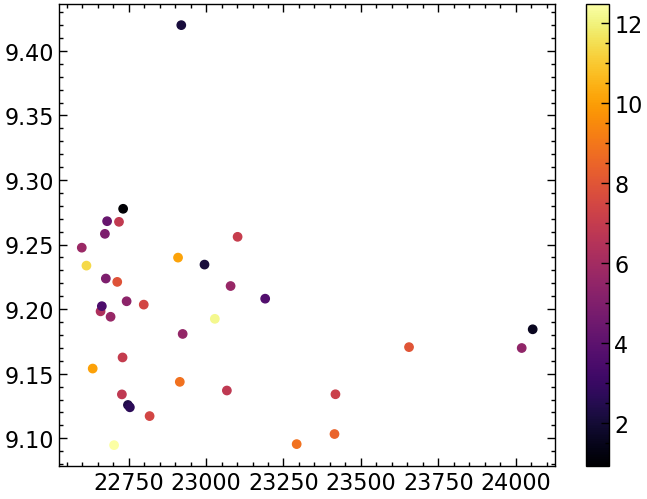

In [51]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['N_Fe']+7.98, c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [52]:
for i in range(len(output_trimmed)):    
    print(f"{output_trimmed['wave_center'].iloc[i]}  {output_trimmed['wave_start'].iloc[i]}  {output_trimmed['wave_end'].iloc[i]}")

22598.75  22597.5  22600.0
22613.8  22611.0  22616.6
22634.0  22631.0  22637.0
22659.4  22656.79  22662.0
22663.5  22662.0  22665.0
22673.4  22672.0  22674.8
22676.4  22675.0  22677.8
22680.5  22678.5  22682.5
22691.75  22689.5  22694.0
22703.0  22701.5  22704.5
22713.25  22710.5  22716.0
22718.9  22717.5  22720.3
22728.25  22727.0  22729.5
22730.4  22729.3  22731.5
22732.25  22731.5  22733.0
22743.5  22742.0  22745.0
22747.75  22746.5  22749.0
22754.0  22752.5  22755.5
22798.85  22797.7  22800.0
22817.75  22816.5  22819.0
22909.55  22907.6  22911.5
22915.25  22913.0  22917.5
22920.0  22918.5  22921.3
22924.5  22923.0  22926.0
22995.0  22994.0  22996.0
23028.35  23025.0  23031.7
23067.25  23065.0  23069.5
23079.25  23078.0  23080.5
23101.85  23100.79  23102.9
23190.9  23189.4  23192.4
23292.6  23291.5  23293.7
23414.7  23413.7  23415.7
23417.8  23416.7  23418.9
23655.35  23653.5  23657.2
24019.2  24017.9  24020.5
24054.65  24053.5  24055.8


In [53]:
(7.98+np.mean(output_trimmed['N_Fe'])).round(3), np.std(output_trimmed['N_Fe']).round(3)

(np.float64(9.195), np.float64(0.064))

In [93]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-18-16-47_0.7599972429435177_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [94]:
output_results_pd_df

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,O_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,HD137613.txt,23712.00,23710.40,23713.6,-0.8004,0.0,-0.0097,6.5,0.0,0.0,10.005106,542.6148,0,0
1,HD137613.txt,23753.50,23752.00,23755.0,-1.3758,0.0,0.0295,6.5,0.0,0.0,5.700532,594.4637,0,0
2,HD137613.txt,23794.95,23793.60,23796.3,-1.0262,0.0,-0.2841,6.5,0.0,0.0,6.533642,648.4755,0,0
3,HD137613.txt,24016.25,24015.00,24017.5,-0.1643,0.0,-0.1290,6.5,0.0,0.0,2.729873,593.8163,0,0
4,HD137613.txt,24099.75,24098.50,24101.0,-0.4034,0.0,-0.4731,6.5,0.0,0.0,12.433981,498.4480,0,0
5,HD137613.txt,24115.20,24113.79,24116.6,-1.0459,0.0,-0.3302,6.5,0.0,0.0,8.647543,683.9931,0,0
6,HD137613.txt,24285.75,24284.50,24287.0,-1.5221,0.0,-0.3137,6.5,0.0,0.0,1.997500,481.5586,0,0
7,HD137613.txt,24299.00,24297.50,24300.5,-1.1699,0.0,-0.3025,6.5,0.0,0.0,3.482172,540.2842,0,0
8,HD137613.txt,24393.85,24392.00,24395.7,-1.1849,0.0,-0.4025,6.5,0.0,0.0,7.436452,532.9237,0,0
9,HD137613.txt,24576.00,24574.60,24577.4,-1.1729,0.0,-0.3847,6.5,0.0,0.0,10.886499,510.7173,0,0


In [95]:
for i in range(len(output_trimmed)):    
    print(f"{output_trimmed['wave_center'].iloc[i]}  {output_trimmed['wave_start'].iloc[i]}  {output_trimmed['wave_end'].iloc[i]}")

23712.0  23710.4  23713.6
23753.5  23752.0  23755.0
23794.95  23793.6  23796.3
24016.25  24015.0  24017.5
24099.75  24098.5  24101.0
24115.2  24113.79  24116.6
24285.75  24284.5  24287.0
24299.0  24297.5  24300.5
24393.85  24392.0  24395.7
24576.0  24574.6  24577.4
24721.0  24719.0  24723.0
24837.2  24836.0  24838.4


In [76]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.498), np.float64(0.148))

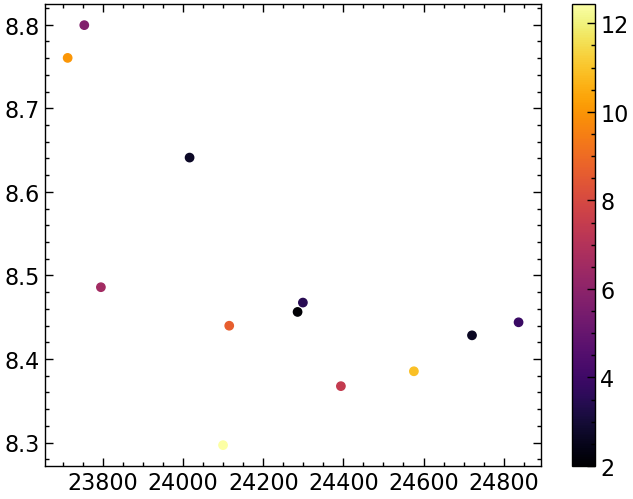

In [77]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [83]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-20-37-03_0.5447894140796702_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


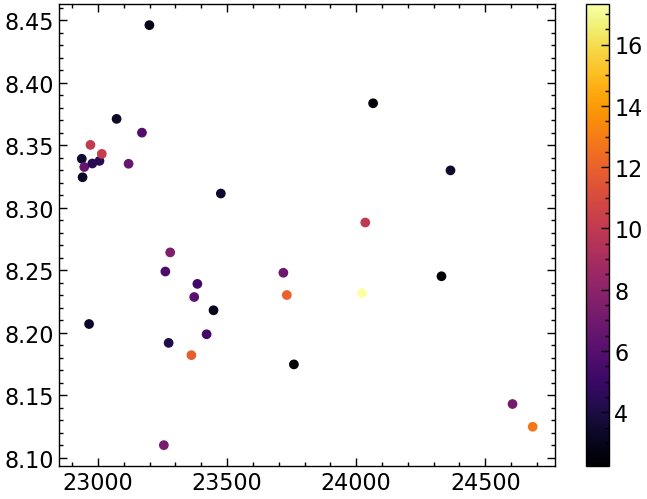

In [85]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [84]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.271), np.float64(0.081))

In [86]:
np.log(np.exp(8.498) + np.exp(8.271))

np.float64(9.084074523518728)

In [88]:
np.exp(8.271)/(np.exp(8.498))

np.float64(0.7969207822901407)

In [96]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd137613/c2', sep='  ')

/tmp/ipykernel_1361439/265521429.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd137613/c2', sep='  ')


In [113]:
rats = np.arange(0.35, 0.7,0.01)
rats = np.repeat(rats, 5)
rats

array([0.35, 0.35, 0.35, 0.35, 0.35, 0.36, 0.36, 0.36, 0.36, 0.36, 0.37,
       0.37, 0.37, 0.37, 0.37, 0.38, 0.38, 0.38, 0.38, 0.38, 0.39, 0.39,
       0.39, 0.39, 0.39, 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.41, 0.41, 0.41,
       0.41, 0.41, 0.42, 0.42, 0.42, 0.42, 0.42, 0.43, 0.43, 0.43, 0.43,
       0.43, 0.44, 0.44, 0.44, 0.44, 0.44, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.46, 0.46, 0.46, 0.46, 0.46, 0.47, 0.47, 0.47, 0.47, 0.47, 0.48,
       0.48, 0.48, 0.48, 0.48, 0.49, 0.49, 0.49, 0.49, 0.49, 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.51, 0.51, 0.51, 0.51, 0.51, 0.52, 0.52, 0.52,
       0.52, 0.52, 0.53, 0.53, 0.53, 0.53, 0.53, 0.54, 0.54, 0.54, 0.54,
       0.54, 0.55, 0.55, 0.55, 0.55, 0.55, 0.56, 0.56, 0.56, 0.56, 0.56,
       0.57, 0.57, 0.57, 0.57, 0.57, 0.58, 0.58, 0.58, 0.58, 0.58, 0.59,
       0.59, 0.59, 0.59, 0.59, 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.61, 0.61,
       0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63,
       0.63, 0.63, 0.64, 0.64, 0.64, 0.64, 0.64, 0.

In [116]:
len(rats)

175

In [117]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Fe),A(N),A(Mg),oisorat
0,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.35
1,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.35
2,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.35
3,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.35
4,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.69
171,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.69
172,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.69
173,HD137613.txt,0.0,5500.0,1.0,0.0,6.5,7.5,11.5,9.7214,8.8,7.3,9.195,7.75,0.69


In [118]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/hd137613/fitlist_comb', sep=' ', index=False)

In [9]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-15-56-09_0.9324879596047584_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [10]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [11]:
df_fine

,specname,O_Fe,Doppler_Shift_add_to_RV,chi_squared,vmac,red_chi_squared,oisorat
0,HD137613.txt,-0.071679,-0.473544,3.959489,0.0,9.356317,0.35
1,HD137613.txt,-0.070000,-0.419780,4.004963,0.0,9.423958,0.35
2,HD137613.txt,-0.071578,-0.418221,4.010714,0.0,9.466629,0.35
3,HD137613.txt,-0.074314,-0.336052,4.107217,0.0,9.739456,0.35
4,HD137613.txt,-0.077374,-0.448116,4.003339,0.0,9.562695,0.35
...,...,...,...,...,...,...,...
170,HD137613.txt,-0.101669,-0.653997,3.465523,0.0,8.499435,0.69
171,HD137613.txt,-0.102761,-0.486558,3.602718,0.0,8.797562,0.69
172,HD137613.txt,-0.106612,-0.552891,3.556538,0.0,8.749684,0.69
173,HD137613.txt,-0.098755,-0.652786,3.459382,0.0,8.450596,0.69


In [4]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(-0.3113629194376325)

In [12]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    subdf.sort_values(by='red_chi_squared', inplace=True)
    subdf = subdf.iloc[:3]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

/tmp/ipykernel_747308/3174125861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.sort_values(by='red_chi_squared', inplace=True)


0.52 0.14 -0.11


Text(0.5, 0, '16O/18O ratio')

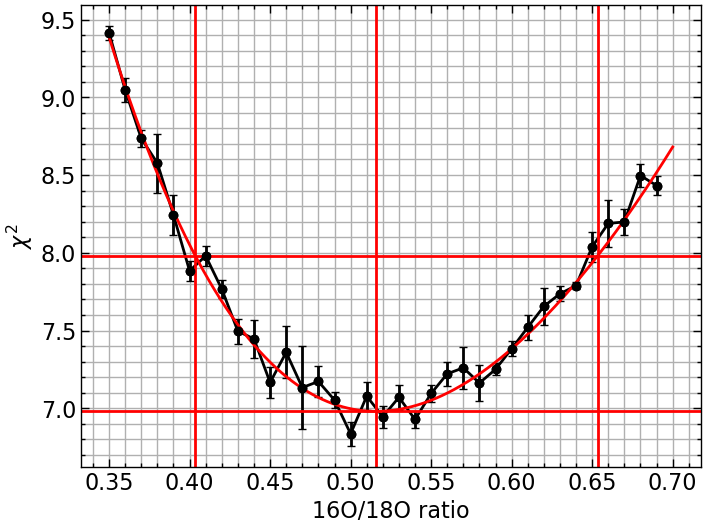

In [13]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(0.35,0.7,1000)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


0.66 0.053 -0.055


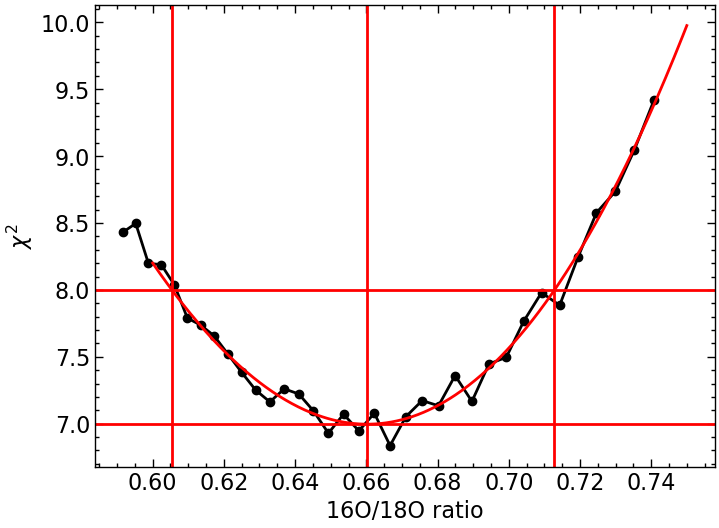

In [19]:
o18rats = 1/(1+rats)
plt.plot(o18rats, chis, 'ko-')
p = np.polyfit(o18rats, chis, 4)

# Evaluate the polynomial fit on a logarithmic scale
x = np.linspace(0.6, 0.75, 500)
y = np.polyval(p, x)

# Convert x back to the original scale for plotting
# x_original = np.exp(x)

# Plot the polynomial fit
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')

# Find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y - ybound)
idx = np.where(diff == np.min(diff))
# Find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx] - xfit).round(3), (x[idx2] - xfit).round(3)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')

print(xfit[0].round(3), xbounds[0][0], xbounds[1][0])

# Label the axes
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# plt.xscale('log')
# xs = np.linspace(np.log(300), np.log(800), 10)
# plt.plot(np.exp(xs), np.polyval(p, (xs)), 'k.')
plt.show()

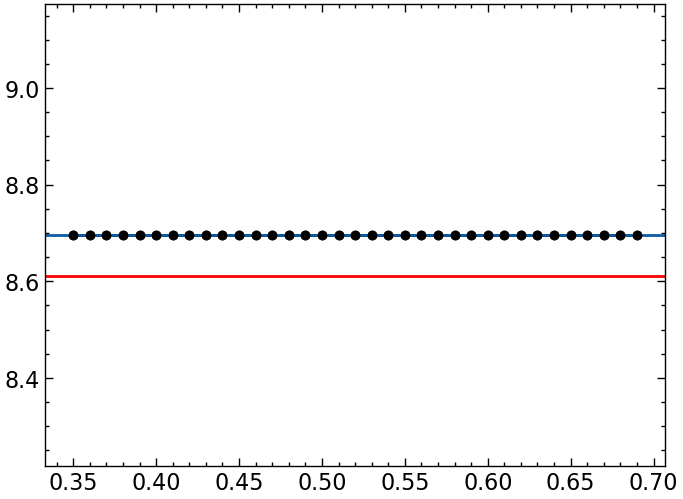

In [165]:
plt.plot(rats, np.array(oabunds)+8.77, 'ko-')
plt.errorbar(rats, np.array(oabunds)+8.77, yerr=doabunds, fmt='ko', capsize=3)
plt.axhline(8.695)
# plt.axhline(8.81, color='r')
plt.axhline(8.695-0.084, color='r')
# plt.axhline(8.81+0.1, color='r')
# plt.axvline(0.52)

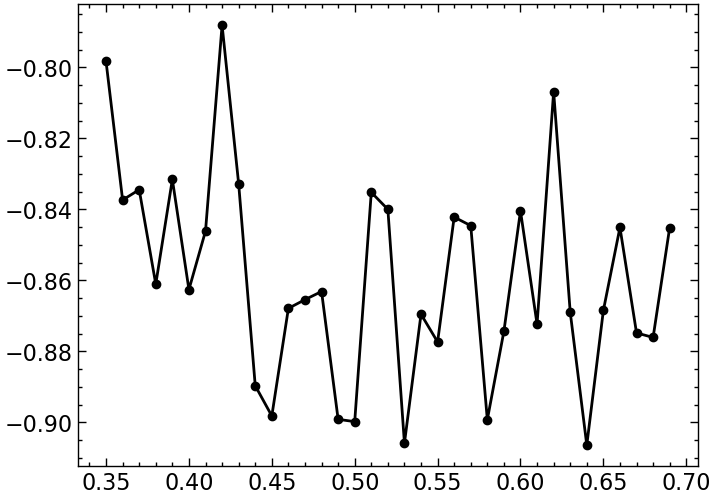

In [166]:
plt.plot(rats, rvs, 'ko-')

In [129]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-18-2024-11-15-46_0.5778776628396651_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


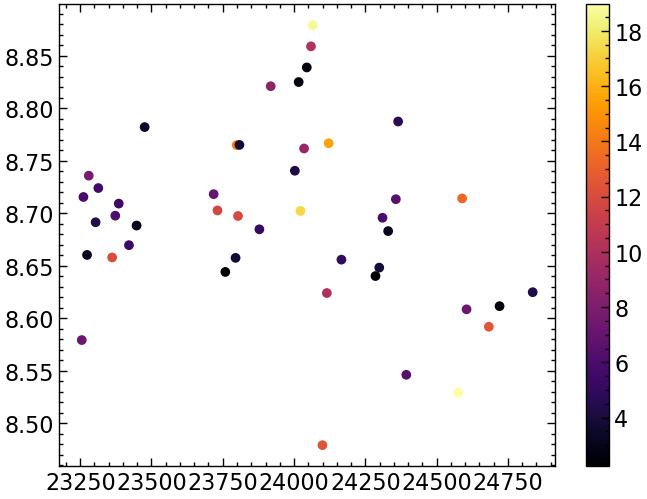

In [130]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [131]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.695), np.float64(0.084))

In [135]:
np.mean(output_trimmed['O_Fe'])

np.float64(-0.07461111111111111)

In [10]:
def printexp(n, exp, filt, howmany):
    strn = f"{exp}+"*n
    strn = strn[:-1]
    strf = f"{filt}+"*n
    strf = strf[:-1]
    strh = f"{howmany}+"*n
    strh = strh[:-1]
    print(f"-filt '{strf}' -exp '{strn}' -noexp '{strh}' ")
    t_total = exp*howmany*n
    print(f"Total time = {t_total} secs")
    t_block = exp*howmany
    print(f"Time per block = {t_block} secs")


In [16]:
printexp(2, 40, "g", 4)

-filt 'g+g' -exp '40+40' -noexp '4+4' 
Total time = 320 secs
Time per block = 160 secs


In [3]:
sudo python make_too.py -ra '17:39:57.0' -dec '3:32:35.6' -ra_rate '0.061' -dec_rate '0.003' -filt 'i+i' -exp '40+40' -noexp '4+4' -name 'CK23A030' -p '7950' -obs_type 'NS' -domesleep '50' -d '20241028' -iit_obs 'advait' -hanle_obs 'kaysang' -stack 'N' -propnums 'P06'

SyntaxError: invalid syntax (1665923938.py, line 1)

In [4]:
rsync -chavzP -e 'ssh -o "ProxyCommand ssh -oHostKeyAlgorithms=+ssh-dss -A growth-crest@117.252.85.44 -W %h:%p"' 'iiap@195.167.1.145:/home/iiap/20241020/Raw/CK23A030/20241018131-510-RA.fits' .

SyntaxError: invalid syntax (4244974217.py, line 1)

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [3]:
target_ra = '17:41:54.8'
target_dec = '3:33:13.0'
target_coords = SkyCoord(ra=target_ra, dec=target_dec, unit=(u.hourangle, u.deg))

In [4]:
actual_ra, actual_dec = (265.969, 3.564)
actual_coords = SkyCoord(ra=actual_ra, dec=actual_dec, unit=(u.deg, u.deg))

In [5]:
target_coords, actual_coords

(<SkyCoord (ICRS): (ra, dec) in deg
     (265.47833333, 3.55361111)>,
 <SkyCoord (ICRS): (ra, dec) in deg
     (265.969, 3.564)>)

In [6]:
# find offset between actual and target
ra_diff = actual_coords.ra - target_coords.ra
dec_diff = actual_coords.dec - target_coords.dec
ra_diff, dec_diff

(<Angle 0.49066667 deg>, <Angle 0.01038889 deg>)

In [7]:
# find separation between actual and target
sep = actual_coords.separation(target_coords)
sep

<Angle 0.48983065 deg>

In [8]:
target_coords_new = SkyCoord(ra=target_coords.ra - ra_diff, dec=target_coords.dec - dec_diff, unit=(u.deg, u.deg))
target_coords_new

<SkyCoord (ICRS): (ra, dec) in deg
    (264.98766667, 3.54322222)>

In [9]:
# format with colons and remove hms dms
target_coords_new.ra.to_string(u.hourangle, sep=':', precision=1), target_coords_new.dec.to_string(u.deg, sep=':', precision=1)

(np.str_('17:39:57.0'), np.str_('3:32:35.6'))

In [13]:
target_ra = '16:03:18.0'
target_dec = '1:51:46.0'
target_coords = SkyCoord(ra=target_ra, dec=target_dec, unit=(u.hourangle, u.deg))

In [14]:
actual_ra, actual_dec = (242.239, 1.984)
actual_coords = SkyCoord(ra=actual_ra, dec=actual_dec, unit=(u.deg, u.deg))

In [15]:
# find offset between actual and target
ra_diff = actual_coords.ra - target_coords.ra
dec_diff = actual_coords.dec - target_coords.dec


In [16]:
ra_diff, dec_diff

(<Angle 1.414 deg>, <Angle 0.12122222 deg>)